## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [23]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# TODO: load in excel file "../../data/raw/realestate.xlsx"
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
df=pd.read_excel(r'C:\Users\xiaoj\Desktop\TKH\Rental-Lab\data\raw\realestate.xlsx')

# check how many missing values we have

df.isna().sum()

No                                         0
X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

In [25]:
# create dictionary of mappings
rename_dict = {
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

# rename columns
df_rename = df.rename(columns=rename_dict)

# view new columns
df_rename.columns

Index(['No', 'house_age', 'distance_to_mrt', 'num_convenience_stores', 'lat',
       'long', 'price_unit_area'],
      dtype='object')

In [26]:
selected = ["lat", "long", "No"]

# TODO: Drop the selected columns 
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_drop = df_rename.drop(columns=selected)


In [27]:
# remove quotes from sample
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].str.strip("\"")

print(df_drop["distance_to_mrt"])

0      84.87882
1      306.5947
2      561.9845
3      561.9845
4      390.5684
         ...   
409    4082.015
410    90.45606
411    390.9696
412    104.8101
413    90.45606
Name: distance_to_mrt, Length: 414, dtype: object


In [10]:
# TODO: convert the "distance_to_mrt" column to the "float" datatype
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].astype(float)
print(df_drop["distance_to_mrt"])

0        84.87882
1       306.59470
2       561.98450
3       561.98450
4       390.56840
          ...    
409    4082.01500
410      90.45606
411     390.96960
412     104.81010
413      90.45606
Name: distance_to_mrt, Length: 414, dtype: float64


In [11]:
# check current "shape" of dataframe
df_drop.shape

(414, 4)

In [58]:
# TODO: Remove missing values from this dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
...

# check shape again
df_drop.dropna()

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
0,32.0,84.87882,100.0,37.9
1,19.5,306.5947,9.0,42.2
2,13.3,561.9845,5.0,47.3
3,13.3,561.9845,5.0,54.8
4,5.0,390.5684,5.0,43.1
...,...,...,...,...
409,13.7,4082.015,0.0,15.4
410,5.6,90.45606,9.0,50.0
411,18.8,390.9696,7.0,40.6
412,8.1,104.8101,5.0,52.5


## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [28]:
# TODO: print out the summary statistics (mean, median, max, min, count) of all numeric columns
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df_drop.describe()

,house_age,num_convenience_stores,price_unit_area
count,403.000000,413.000000,414.000000
mean,18.607196,4.283293,37.980193
std,22.656541,5.580361,13.606488
min,0.000000,-6.000000,7.600000
25%,8.700000,1.000000,27.700000
50%,16.100000,4.000000,38.450000
75%,28.300000,6.000000,46.600000
max,410.300000,100.000000,117.500000


In [38]:
#df_drop.median  not the result of median function because just looking at the memory , ()call for the function
df_drop.median()

house_age                     16.1
distance_to_mrt           492.2313
num_convenience_stores         4.0
price_unit_area              38.45
dtype: object

In [59]:
# notice how the minimum value for "num_convenience_stores" is -6
# how do we have -6 convenience stores? this must be an error, let's remove it

df_outl = df_drop[df_drop.num_convenience_stores >= 0]
df_outl.shape

(412, 4)

In [39]:
# notice how the maximum value for "num_convenience_stores" is 100
# (the median convenice stores is 4, the mean is 4.29, this shows that this is most likely an error)

# TODO: implement this logic in the brackets
# documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
df_outl = df_outl[df_drop.num_convenience_stores <100]
df_outl.shape

C:\Users\xiaoj\AppData\Local\Temp\ipykernel_15404\4111264817.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outl = df_outl[df_drop.num_convenience_stores <100]


(410, 4)

In [40]:
# notice how the maximum "house_age" is 410.3 years old 
# not looking at statistics, the oldest house in Taiwan was built in the 17th century (300 years at most)
# let's remove this value
df_outl = df_outl[df_outl.house_age != 410.3]
df_outl.shape

(410, 4)

<Axes: xlabel='price_unit_area', ylabel='Count'>

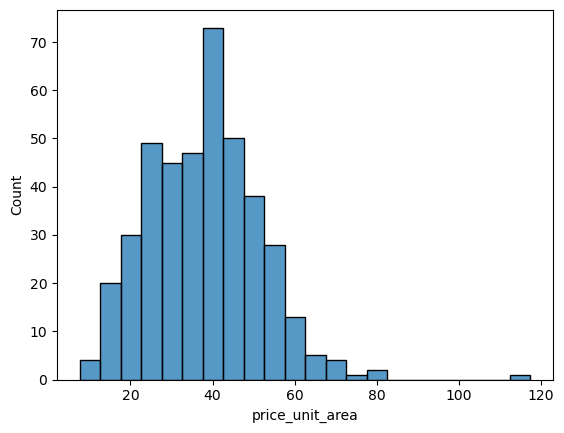

In [42]:
# let's explore our visualizations again, starting with univariate

# TODO : plot histogram of "price_unit_area" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html

sns.histplot(data=df_outl,x="price_unit_area")

<Axes: xlabel='house_age', ylabel='Count'>

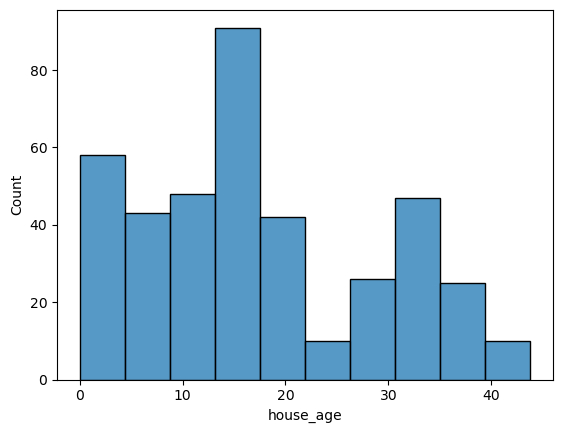

In [43]:
# TODO : plot histogram of "house_age" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=df_outl,x="house_age")

<Axes: xlabel='num_convenience_stores', ylabel='Count'>

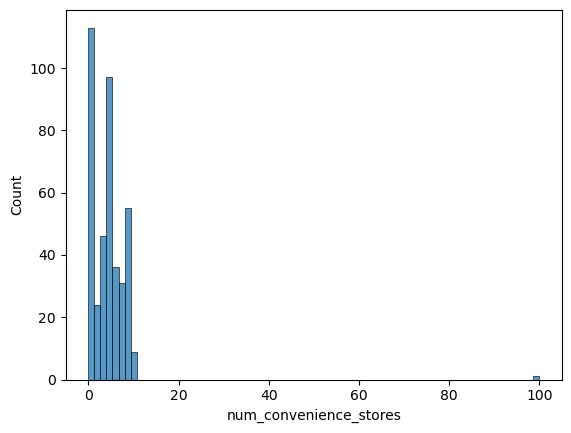

In [60]:
# TODO : plot histogram of "num_convenience_stores" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=df_outl,x="num_convenience_stores")

<Axes: xlabel='distance_to_mrt', ylabel='Count'>

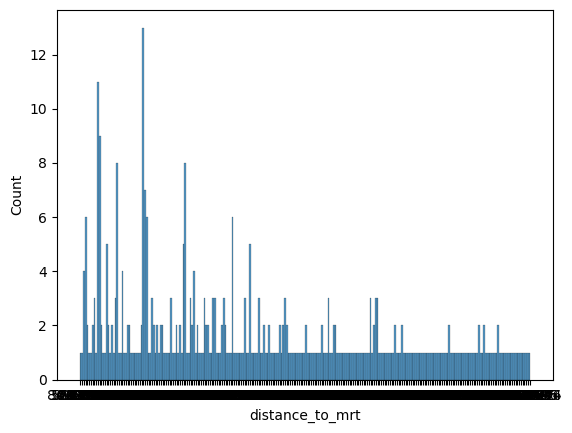

In [61]:
# TODO : plot histogram of "distance_to_mrt" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=df_outl,x="distance_to_mrt")

<Axes: xlabel='house_age', ylabel='price_unit_area'>

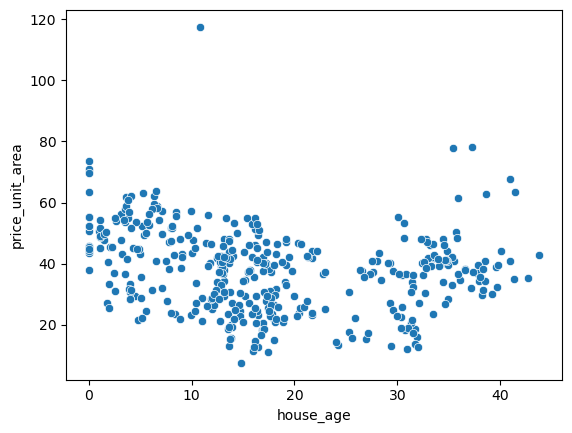

In [44]:
# next we move onto scatter-plots (bi-variate analysis)

# TODO : plot scatter plot of "house_age" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="house_age", y="price_unit_area") #y is always depend, x is indepent, y is the column that we want to predict on.

<Axes: xlabel='num_convenience_stores', ylabel='price_unit_area'>

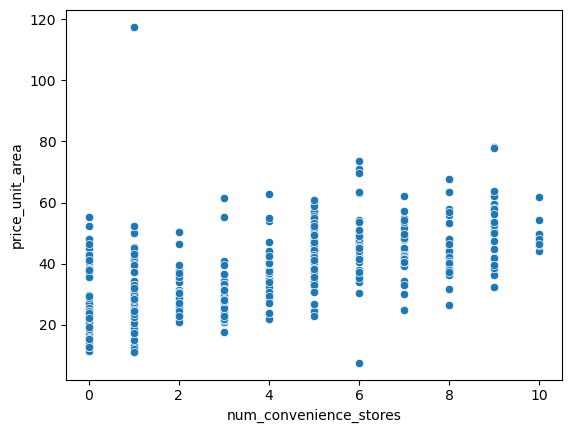

In [47]:
# TODO : plot scatter plot of "num_convenice_stores" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="num_convenience_stores", y="price_unit_area") 

<Axes: xlabel='distance_to_mrt', ylabel='price_unit_area'>

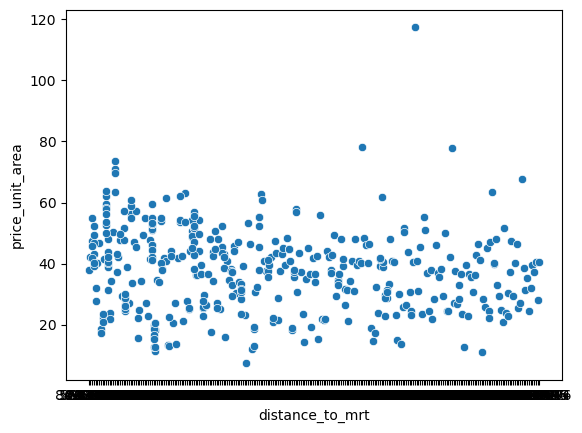

In [62]:
# TODO : plot scatter plot of "distance_to_mrt" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="distance_to_mrt", y="price_unit_area") 

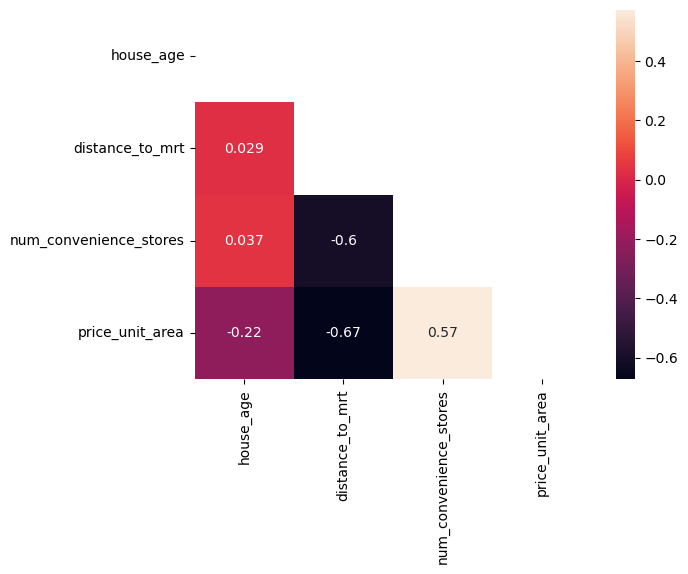

In [57]:
mask = np.triu(np.ones_like(df_outl.corr(), dtype=np.bool_))

sns.heatmap(df_outl.corr(), annot=True, mask=mask)#annot shows number
plt.show()#the closer to 1 the more power the relationship. correlationship. mrt: distance to closest subway station

In [69]:
# save data for later modeling
df_drop.to_csv("../../data/processed/tpdata.csv", index=False)